In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv("BTC-USD_SIGNALS.csv")
data

,Date,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG
0,2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,-0.292146,-2.712213,-1.043523,-1.108359,-0.475907,1.319161,-0.323408,0.521410,1.144750,-0.774692,-0.186892,-0.583209
1,2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,-0.152676,-1.011481,-1.204172,-1.202571,-0.654534,1.402518,-0.323408,0.393472,1.144750,-0.774692,-0.186892,-1.244407
2,2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,-0.427993,0.955604,-1.632900,-1.235294,-0.618233,-0.269198,0.287977,0.409785,1.114249,-0.774692,-0.186892,-0.142410
3,2018-02-04,9175.700195,9334.870117,8031.220215,8277.009766,-0.437581,-2.584947,-1.626830,-1.320379,-0.741794,0.093536,-0.323408,0.427573,1.114249,-1.144752,-0.264496,-0.847688
4,2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,-0.326118,-4.184569,-1.814295,-1.479953,-1.057732,1.828350,-0.323408,0.462483,1.114249,-1.144752,-0.264496,-1.420727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,0.478227,0.148948,-1.113287,-0.844382,-0.254845,-0.167922,-0.323408,0.699748,-1.063067,-0.648298,-0.307825,-1.024008
1680,2022-09-05,19988.789063,20031.160156,19673.046875,19812.371094,0.658018,-0.278482,-1.133325,-0.831832,-0.166540,-0.269198,-0.256709,0.691814,-0.742360,-0.648298,-0.307825,-0.891768
1681,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,1.393318,-1.325705,-1.548973,-0.892284,-0.308652,1.167318,-0.323408,0.776149,-0.742360,-0.165203,-0.359746,-0.935848
1682,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,0.981876,0.568952,-1.180050,-0.893278,-0.249058,-0.012950,-0.323408,0.881401,-0.742360,-0.165203,-0.359746,-0.847688


# Correlations

In [3]:
corr = data.corr("spearman")
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG
Open,1.000000,0.998789,0.998368,0.997318,0.695698,-0.028736,0.088752,0.154858,-0.004918,0.142089,0.146516,-0.108522,-0.082210,-0.088747,0.887638,0.273665
High,0.998789,1.000000,0.997863,0.998676,0.702281,0.001898,0.096506,0.155834,-0.000358,0.125810,0.171340,-0.104764,-0.078512,-0.089046,0.889125,0.274098
Low,0.998368,0.997863,1.000000,0.998754,0.691858,0.003975,0.100563,0.158835,0.004588,0.111547,0.164926,-0.113920,-0.088293,-0.083622,0.883554,0.276658
Close,0.997318,0.998676,0.998754,1.000000,0.697723,0.031704,0.105808,0.159204,0.006816,0.106101,0.180015,-0.108744,-0.082135,-0.085757,0.885856,0.275767
Volume,0.695698,0.702281,0.691858,0.697723,1.000000,0.038129,0.190448,0.243312,0.006024,0.095845,0.178726,-0.081463,0.140704,0.258613,0.579938,0.300334
Variation,-0.028736,0.001898,0.003975,0.031704,0.038129,1.000000,0.249757,0.081463,0.142537,-0.570820,0.555649,0.018352,0.046942,0.052755,-0.030147,0.046482
RSI,0.088752,0.096506,0.100563,0.105808,0.190448,0.249757,1.000000,0.673356,0.656900,-0.258543,0.251322,0.067245,0.157509,0.262073,0.054013,0.604237
MACD,0.154858,0.155834,0.158835,0.159204,0.243312,0.081463,0.673356,1.000000,0.209437,-0.101210,0.105208,-0.010269,0.202946,0.378117,0.127921,0.811152
MACD_H,-0.004918,-0.000358,0.004588,0.006816,0.006024,0.142537,0.656900,0.209437,1.000000,-0.197181,0.191870,0.113791,0.041363,0.013287,-0.001313,0.183401
-DM,0.142089,0.125810,0.111547,0.106101,0.095845,-0.570820,-0.258543,-0.101210,-0.197181,1.000000,-0.637194,-0.016526,-0.069246,-0.107972,0.166414,-0.111700


In [4]:
corr[["Variation"]].sort_values(by="Variation")

,Variation
-DM,-0.570820
Miners Revenue,-0.030147
Open,-0.028736
High,0.001898
Low,0.003975
ADX14,0.018352
Close,0.031704
Volume,0.038129
FnG,0.046482
Confirmation Time,0.046942


array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>,
        <AxesSubplot:xlabel='Variation', ylabel='Open'>,
        <AxesSubplot:xlabel='RSI', ylabel='Open'>,
        <AxesSubplot:xlabel='MACD', ylabel='Open'>,
        <AxesSubplot:xlabel='MACD_H', ylabel='Open'>,
        <AxesSubplot:xlabel='-DM', ylabel='Open'>,
        <AxesSubplot:xlabel='+DM', ylabel='Open'>,
        <AxesSubplot:xlabel='ADX14', ylabel='Open'>,
        <AxesSubplot:xlabel='Confirmation Time', ylabel='Open'>,
        <AxesSubplot:xlabel='Transactions', ylabel='Open'>,
        <AxesSubplot:xlabel='Miners Revenue', ylabel='Open'>,
        <AxesSubplot:xlabel='FnG', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabe

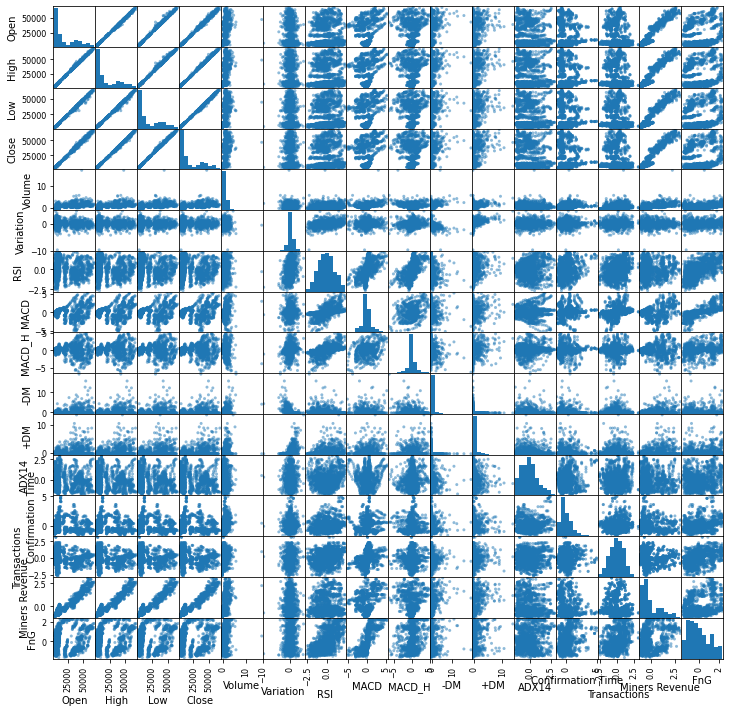

In [6]:
pd.plotting.scatter_matrix(data,figsize=[12,12])

## Adding Variation+1

In [7]:
newdata = data.copy()
newdata["Variation+1"] = data["Variation"].shift(-1)
newdata

,Date,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG,Variation+1
0,2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,-0.292146,-2.712213,-1.043523,-1.108359,-0.475907,1.319161,-0.323408,0.521410,1.144750,-0.774692,-0.186892,-0.583209,-1.011481
1,2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,-0.152676,-1.011481,-1.204172,-1.202571,-0.654534,1.402518,-0.323408,0.393472,1.144750,-0.774692,-0.186892,-1.244407,0.955604
2,2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,-0.427993,0.955604,-1.632900,-1.235294,-0.618233,-0.269198,0.287977,0.409785,1.114249,-0.774692,-0.186892,-0.142410,-2.584947
3,2018-02-04,9175.700195,9334.870117,8031.220215,8277.009766,-0.437581,-2.584947,-1.626830,-1.320379,-0.741794,0.093536,-0.323408,0.427573,1.114249,-1.144752,-0.264496,-0.847688,-4.184569
4,2018-02-05,8270.540039,8364.839844,6756.680176,6955.270020,-0.326118,-4.184569,-1.814295,-1.479953,-1.057732,1.828350,-0.323408,0.462483,1.114249,-1.144752,-0.264496,-1.420727,2.918547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,0.478227,0.148948,-1.113287,-0.844382,-0.254845,-0.167922,-0.323408,0.699748,-1.063067,-0.648298,-0.307825,-1.024008,-0.278482
1680,2022-09-05,19988.789063,20031.160156,19673.046875,19812.371094,0.658018,-0.278482,-1.133325,-0.831832,-0.166540,-0.269198,-0.256709,0.691814,-0.742360,-0.648298,-0.307825,-0.891768,-1.325705
1681,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,1.393318,-1.325705,-1.548973,-0.892284,-0.308652,1.167318,-0.323408,0.776149,-0.742360,-0.165203,-0.359746,-0.935848,0.568952
1682,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,0.981876,0.568952,-1.180050,-0.893278,-0.249058,-0.012950,-0.323408,0.881401,-0.742360,-0.165203,-0.359746,-0.847688,0.000209


In [8]:
corr = newdata.corr("spearman")
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG,Variation+1
Open,1.000000,0.998789,0.998368,0.997318,0.695698,-0.028736,0.088752,0.154858,-0.004918,0.142089,0.146516,-0.108522,-0.082210,-0.088747,0.887638,0.273665,-0.023793
High,0.998789,1.000000,0.997863,0.998676,0.702281,0.001898,0.096506,0.155834,-0.000358,0.125810,0.171340,-0.104764,-0.078512,-0.089046,0.889125,0.274098,-0.024598
Low,0.998368,0.997863,1.000000,0.998754,0.691858,0.003975,0.100563,0.158835,0.004588,0.111547,0.164926,-0.113920,-0.088293,-0.083622,0.883554,0.276658,-0.026967
Close,0.997318,0.998676,0.998754,1.000000,0.697723,0.031704,0.105808,0.159204,0.006816,0.106101,0.180015,-0.108744,-0.082135,-0.085757,0.885856,0.275767,-0.028394
Volume,0.695698,0.702281,0.691858,0.697723,1.000000,0.038129,0.190448,0.243312,0.006024,0.095845,0.178726,-0.081463,0.140704,0.258613,0.579938,0.300334,0.022955
Variation,-0.028736,0.001898,0.003975,0.031704,0.038129,1.000000,0.249757,0.081463,0.142537,-0.570820,0.555649,0.018352,0.046942,0.052755,-0.030147,0.046482,-0.045078
RSI,0.088752,0.096506,0.100563,0.105808,0.190448,0.249757,1.000000,0.673356,0.656900,-0.258543,0.251322,0.067245,0.157509,0.262073,0.054013,0.604237,0.037720
MACD,0.154858,0.155834,0.158835,0.159204,0.243312,0.081463,0.673356,1.000000,0.209437,-0.101210,0.105208,-0.010269,0.202946,0.378117,0.127921,0.811152,0.035004
MACD_H,-0.004918,-0.000358,0.004588,0.006816,0.006024,0.142537,0.656900,0.209437,1.000000,-0.197181,0.191870,0.113791,0.041363,0.013287,-0.001313,0.183401,0.007900
-DM,0.142089,0.125810,0.111547,0.106101,0.095845,-0.570820,-0.258543,-0.101210,-0.197181,1.000000,-0.637194,-0.016526,-0.069246,-0.107972,0.166414,-0.111700,0.020737


In [9]:
corr[["Variation+1"]].sort_values(by="Variation+1")

,Variation+1
Variation,-0.045078
Miners Revenue,-0.035875
Close,-0.028394
Low,-0.026967
High,-0.024598
Open,-0.023793
+DM,-0.005756
MACD_H,0.007900
ADX14,0.012656
-DM,0.020737


In [10]:
#plt.show()

## Variation with respect to other variables

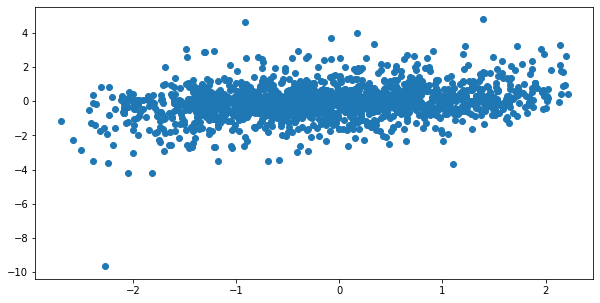

In [11]:
plt.figure(figsize=[10,5])
plt.scatter(data["RSI"],data["Variation"])

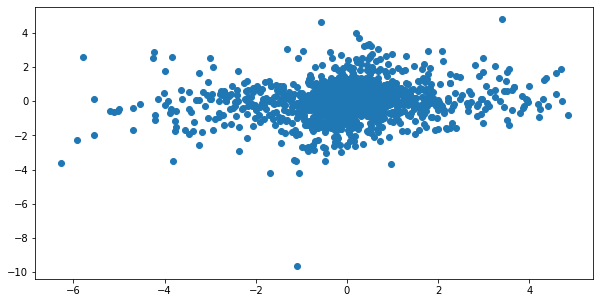

In [12]:
plt.figure(figsize=[10,5])
plt.scatter(data["MACD_H"],data["Variation"])

No handles with labels found to put in legend.


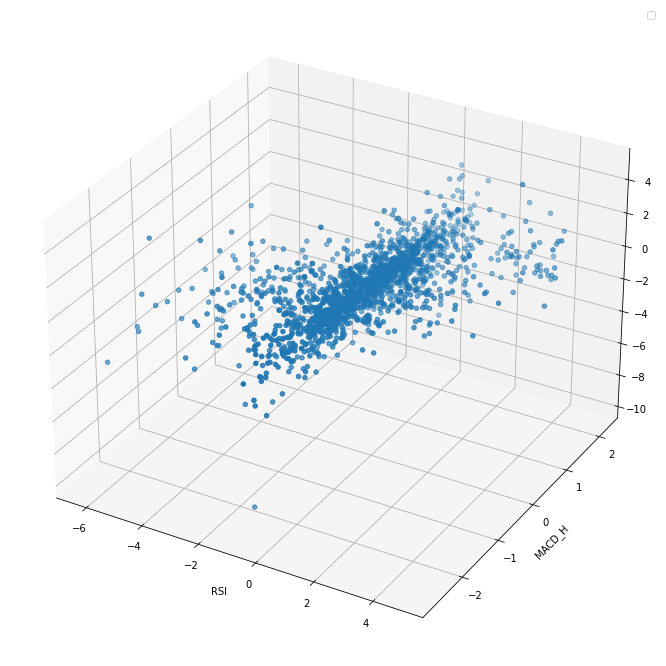

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(list(data["MACD_H"]),list(data["RSI"]),list(data["Variation"]))
plt.xlabel(xlabel="RSI")
plt.ylabel(ylabel="MACD_H")
plt.legend()
plt.show()

# Examining Predict Data

## Initial Data

In [14]:
predict_data = data.copy().drop(["Open","Close","High","Low"],axis=1)
max_days = 5
target_range = 2
for i in range(1,max_days):#2jours
    #predict_data[["Variation-{}".format(i),"Vol-{}".format(i),"RSI-{}".format(i),"MACD-{}".format(i),"MACD_H-{}".format(i),"CONF-{}".format(i),"TRANS-{}".format(i),"REV-{}".format(i),"FnG-{}".format(i)]] = data[["Variation","Volume","RSI","MACD","MACD_H","Confirmation Time","Transactions","Miners Revenue","FnG"]].shift(i)
    predict_data[["Variation-{}".format(i),"Vol-{}".format(i),"RSI-{}".format(i),"MACD-{}".format(i),"MACD_H-{}".format(i),"CONF-{}".format(i),"TRANS-{}".format(i),"REV-{}".format(i),"FnG-{}".format(i), "ADX-{}".format(i), "+DM-{}".format(i), "-DM-{}".format(i)]] = data[["Variation","Volume","RSI","MACD","MACD_H","Confirmation Time","Transactions","Miners Revenue","FnG","ADX14","+DM","-DM"]].shift(i)
    #predict_data[["Variation-{}".format(i),"Vol-{}".format(i),"RSI-{}".format(i),"MACD-{}".format(i),"MACD_H-{}".format(i)]] = data[["Variation","Volume","RSI","MACD","MACD_H"]].shift(i)
#predict_data["Target"] = (data["Variation"].shift(-1) >= 0)
predict_data["Target"] = (data["Close"].shift(-target_range) - data["Close"] >= 0)
predict_data["Target"] = np.where(predict_data["Target"] == True, 1, 0)
predict_data.dropna(inplace=True)
predict_data.reset_index(inplace=True,drop=True)
predict_data = predict_data[0:len(predict_data)-target_range]

In [15]:
corr = predict_data.corr()

In [16]:
corr

,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG,Variation-1,Vol-1,RSI-1,MACD-1,MACD_H-1,CONF-1,TRANS-1,REV-1,FnG-1,ADX-1,+DM-1,-DM-1,Variation-2,Vol-2,RSI-2,MACD-2,MACD_H-2,CONF-2,TRANS-2,REV-2,FnG-2,ADX-2,+DM-2,-DM-2,Variation-3,Vol-3,RSI-3,MACD-3,MACD_H-3,CONF-3,TRANS-3,REV-3,FnG-3,ADX-3,+DM-3,-DM-3,Variation-4,Vol-4,RSI-4,MACD-4,MACD_H-4,CONF-4,TRANS-4,REV-4,FnG-4,ADX-4,+DM-4,-DM-4,Target
Volume,1.000000,0.009431,0.158619,0.239835,-0.085981,0.388817,0.314519,-0.027063,0.226088,0.238597,0.555304,0.338422,0.013645,0.785571,0.173671,0.253400,-0.058209,0.222134,0.225912,0.555144,0.355843,-0.033305,0.291877,0.271324,0.036871,0.757769,0.190088,0.264155,-0.033984,0.216611,0.218042,0.556829,0.360186,-0.039384,0.260863,0.222614,0.015644,0.768002,0.193689,0.271587,-0.015730,0.212599,0.218054,0.554481,0.370318,-0.044770,0.253815,0.242697,0.021673,0.755183,0.204680,0.278719,0.006009,0.210192,0.228183,0.553869,0.376123,-0.049075,0.268678,0.288153,0.006106
Variation,0.009431,1.000000,0.279611,0.068868,0.151160,-0.451708,0.482092,0.029749,0.055949,0.046299,-0.016474,0.062374,-0.051772,0.017133,0.049781,0.019172,0.006514,0.062905,0.040081,-0.024785,0.054610,0.025574,-0.002122,0.037494,0.050489,0.005943,0.055200,0.019479,0.008916,0.065070,0.040095,-0.033113,0.052104,0.019692,0.003144,-0.015245,0.004537,0.029164,0.048110,0.017083,0.002196,0.063557,0.052574,-0.034812,0.047004,0.015658,0.035307,-0.018736,0.046915,0.002125,0.044324,0.014896,-0.004395,0.068942,0.040657,-0.036432,0.035870,0.009717,0.011163,-0.046871,-0.011870
RSI,0.158619,0.279611,1.000000,0.545889,0.546000,-0.162832,0.207091,0.115035,0.210277,0.264752,0.074057,0.602597,0.264783,0.151973,0.925894,0.506604,0.539337,0.212868,0.262804,0.058834,0.573805,0.112245,0.206975,-0.153618,0.267320,0.137771,0.859954,0.466430,0.527765,0.214842,0.258070,0.040885,0.543929,0.106555,0.206072,-0.152140,0.270409,0.132992,0.793410,0.425196,0.509239,0.216150,0.253893,0.022632,0.511444,0.099274,0.209555,-0.157636,0.264739,0.120986,0.726253,0.383210,0.483361,0.218635,0.243381,0.004127,0.477035,0.089766,0.201713,-0.160290,0.038645
MACD,0.239835,0.068868,0.545889,1.000000,0.299814,-0.036922,0.170878,0.030723,0.145601,0.279857,0.271094,0.720620,0.106180,0.227889,0.572581,0.994559,0.357152,0.146251,0.278865,0.262176,0.722304,0.039949,0.207324,-0.074626,0.134258,0.214925,0.589166,0.980766,0.398198,0.147748,0.276198,0.249971,0.718102,0.048064,0.232756,-0.104923,0.156175,0.204697,0.597076,0.960475,0.425580,0.149664,0.272994,0.235510,0.709730,0.055123,0.253604,-0.129338,0.174520,0.193860,0.597959,0.935193,0.441326,0.152512,0.268749,0.219046,0.697168,0.060943,0.267942,-0.151371,0.020941
MACD_H,-0.085981,0.151160,0.546000,0.299814,1.000000,-0.217498,0.185923,0.127955,0.002714,0.014742,-0.038114,0.193042,0.228287,-0.105588,0.513821,0.222389,0.966845,0.008772,0.007715,-0.058468,0.158729,0.129087,0.255274,-0.285596,0.266780,-0.123068,0.458671,0.136134,0.892757,0.016025,-0.002025,-0.084242,0.114794,0.126870,0.279933,-0.317495,0.276071,-0.128512,0.389508,0.048154,0.793511,0.023288,-0.011145,-0.111635,0.066849,0.121868,0.284267,-0.323072,0.270755,-0.134826,0.313762,-0.036703,0.680700,0.031698,-0.021322,-0.139342,0.016772,0.114412,0.269478,-0.321247,-0.012357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FnG-4,0.376123,0.035870,0.477035,0.697168,0.016772,0.071488,0.151285,0.064463,0.354569,0.398457,0.302402,0.877678,0.047077,0.371195,0.511191,0.709696,0.066917,0.352618,0.398889,0.301119,0.901456,0.069921,0.149257,0.057135,0.052640,0.361719,0.543886,0.718196,0.115155,0.351502,0.400106,0.297796,0.925169,0.075136,0.155463,0.051220,0.053588,0.357291,0.573337,0.722158,0.159000,0.349951,0.405853,0.296082,0.952262,0.079590,0.145967,0.049681,0.064164,0.340086,0.602035,0.720539,0.1

In [17]:
corr["Target"].sort_values()

REV-2               -0.062715
REV-3               -0.061792
REV-1               -0.060918
REV-4               -0.059804
Miners Revenue      -0.056632
                       ...   
TRANS-2              0.082786
CONF-2               0.084255
Confirmation Time    0.086476
CONF-1               0.089037
Target               1.000000
Name: Target, Length: 61, dtype: float64

## Grouping Data by Mean

In [18]:
new_predict_data = predict_data.copy()

In [19]:
""""""
RSIs = ["RSI-{}".format(i) for i in range(1,max_days)]
RSIs.append("RSI")
MACDs = ["MACD-{}".format(i) for i in range(1,max_days)]
MACDs.append("MACD")
MACD_Hs = ["MACD_H-{}".format(i) for i in range(1,max_days)]
MACD_Hs.append("MACD_H")
Variations = ["Variation-{}".format(i) for i in range(1,max_days)]
Variations.append("Variation")
Revenues = ["REV-{}".format(i) for i in range(1,max_days)]
Revenues.append("Miners Revenue")
pDMs = ["+DM-{}".format(i) for i in range(1,max_days)]
pDMs.append("+DM")
mDMs = ["-DM-{}".format(i) for i in range(1,max_days)]
mDMs.append("-DM")
ADXs = ["ADX-{}".format(i) for i in range(1,max_days)]
ADXs.append("ADX14")
new_predict_data["RSI_MEAN"] = new_predict_data[RSIs].mean(axis=1)
new_predict_data["MACD_MEAN"] = new_predict_data[MACDs].mean(axis=1)
new_predict_data["MACD_H_MEAN"] = new_predict_data[MACD_Hs].mean(axis=1)
new_predict_data["Variation_MEAN"] = new_predict_data[Variations].mean(axis=1)
new_predict_data["Revenues_MEAN"] = new_predict_data[Revenues].mean(axis=1)
new_predict_data["+DM_MEAN"] = new_predict_data[pDMs].mean(axis=1)
new_predict_data["-DM_MEAN"] = new_predict_data[mDMs].mean(axis=1)
new_predict_data["ADX_MEAN"] = new_predict_data[ADXs].mean(axis=1)
new_predict_data.drop(RSIs+MACDs+MACD_Hs+Variations+Revenues+pDMs+mDMs+ADXs,axis=1,inplace=True)

In [20]:
new_predict_data

,Date,Volume,Confirmation Time,Transactions,FnG,Vol-1,CONF-1,TRANS-1,FnG-1,Vol-2,CONF-2,TRANS-2,FnG-2,Vol-3,CONF-3,TRANS-3,FnG-3,Vol-4,CONF-4,TRANS-4,FnG-4,Target,RSI_MEAN,MACD_MEAN,MACD_H_MEAN,Variation_MEAN,Revenues_MEAN,+DM_MEAN,-DM_MEAN,ADX_MEAN
0,2018-02-05,-0.326118,1.114249,-1.144752,-1.420727,-0.437581,1.114249,-1.144752,-0.847688,-0.427993,1.114249,-0.774692,-0.142410,-0.152676,1.144750,-0.774692,-1.244407,-0.292146,1.144750,-0.774692,-0.583209,1,-1.464344,-1.269311,-0.709640,-1.907521,-0.217933,-0.201131,0.874873,0.442945
1,2018-02-06,-0.088527,0.453384,-1.144752,-1.552966,-0.326118,1.114249,-1.144752,-1.420727,-0.437581,1.114249,-1.144752,-0.847688,-0.427993,1.114249,-0.774692,-0.142410,-0.152676,1.144750,-0.774692,-1.244407,1,-1.498138,-1.352398,-0.809096,-0.781369,-0.233454,-0.201131,0.790375,0.439774
2,2018-02-07,-0.331965,0.453384,-1.959889,-0.318730,-0.088527,0.453384,-1.144752,-1.552966,-0.326118,1.114249,-1.144752,-1.420727,-0.437581,1.114249,-1.144752,-0.847688,-0.427993,1.114249,-0.774692,-0.142410,1,-1.548785,-1.422310,-0.850266,-0.678191,-0.315423,0.077957,0.456032,0.466214
3,2018-02-08,-0.323021,0.453384,-1.959889,-0.583209,-0.331965,0.453384,-1.959889,-0.318730,-0.088527,0.453384,-1.144752,-1.552966,-0.326118,1.114249,-1.144752,-1.420727,-0.437581,1.114249,-1.144752,-0.847688,1,-1.434930,-1.476227,-0.836585,-0.442400,-0.397391,-0.023270,0.456032,0.503496
4,2018-02-09,-0.452131,0.207605,-1.959889,0.033910,-0.323021,0.453384,-1.959889,-0.583209,-0.331965,0.453384,-1.959889,-0.318730,-0.088527,0.453384,-1.144752,-1.552966,-0.326118,1.114249,-1.144752,-1.420727,0,-1.275593,-1.494747,-0.722483,0.359155,-0.463839,0.052270,0.383485,0.543338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2022-09-02,0.673668,-1.063067,-0.310919,-0.803608,0.726988,-1.313931,-0.310919,-1.024008,0.880353,-1.313931,-0.310919,-0.891768,0.943757,-1.313931,-1.414496,-0.715449,0.850751,-1.263537,-1.414496,-0.847688,1,-1.340356,-0.862516,-0.822186,0.044765,-0.236214,-0.066210,-0.221270,0.398301
1674,2022-09-03,0.395940,-1.063067,-0.648298,-0.979928,0.673668,-1.063067,-0.310919,-0.803608,0.726988,-1.313931,-0.310919,-1.024008,0.880353,-1.313931,-0.310919,-0.891768,0.943757,-1.313931,-1.414496,-0.715449,0,-1.213730,-0.871510,-0.683202,-0.170605,-0.262783,-0.158790,-0.182954,0.500567
1675,2022-09-04,0.478227,-1.063067,-0.648298,-1.024008,0.395940,-1.063067,-0.648298,-0.979928,0.673668,-1.063067,-0.310919,-0.803608,0.726988,-1.313931,-0.310919,-1.024008,0.880353,-1.313931,-0.310919,-0.891768,0,-1.105659,-0.866115,-0.530078,-0.002485,-0.289351,-0.237285,-0.162699,0.592802
1676,2022-09-05,0.658018,-0.742360,-0.648298,-0.891768,0.478227,-1.063067,-0.648298,-1.024008,0.395940,-1.063067,-0.648298,-0.979928,0.673668,-1.063067,-0.310919,-0.803608,0.726988,-1.313931,-0.310919,-1.024008,0,-1.051108,-0.856451,-0.395136,-0.113746,-0.295509,-0.223945,-0.162699,0.644182


In [21]:
corr = new_predict_data.corr()

In [22]:
corr

,Volume,Confirmation Time,Transactions,FnG,Vol-1,CONF-1,TRANS-1,FnG-1,Vol-2,CONF-2,TRANS-2,FnG-2,Vol-3,CONF-3,TRANS-3,FnG-3,Vol-4,CONF-4,TRANS-4,FnG-4,Target,RSI_MEAN,MACD_MEAN,MACD_H_MEAN,Variation_MEAN,Revenues_MEAN,+DM_MEAN,-DM_MEAN,ADX_MEAN
Volume,1.000000,0.226088,0.238597,0.338422,0.785571,0.222134,0.225912,0.355843,0.757769,0.216611,0.218042,0.360186,0.768002,0.212599,0.218054,0.370318,0.755183,0.210192,0.228183,0.376123,0.006106,0.195450,0.263910,-0.039498,0.043494,0.560423,0.477329,0.509307,-0.039605
Confirmation Time,0.226088,1.000000,0.081369,0.352441,0.233063,0.982190,0.081963,0.352820,0.238906,0.964388,0.082614,0.353743,0.248204,0.946320,0.089390,0.353450,0.251145,0.914858,0.096197,0.354569,0.086476,0.217173,0.146808,-0.003859,0.115359,-0.180858,0.066614,-0.017302,0.135374
Transactions,0.238597,0.081369,1.000000,0.408992,0.230322,0.080057,0.898672,0.405861,0.212700,0.079023,0.797592,0.399625,0.182634,0.078038,0.697990,0.398664,0.173963,0.077386,0.728880,0.398457,0.066625,0.280661,0.280591,0.016401,0.151287,-0.101730,0.023980,-0.125549,-0.014066
FnG,0.338422,0.352441,0.408992,1.000000,0.327852,0.351248,0.408118,0.952915,0.322375,0.350351,0.402955,0.925292,0.307332,0.350620,0.400293,0.901499,0.316578,0.350827,0.402490,0.877678,0.059764,0.639716,0.699441,0.203090,0.404503,0.265140,0.408138,-0.091897,0.090156
Vol-1,0.785571,0.233063,0.230322,0.327852,1.000000,0.225751,0.239236,0.339379,0.785802,0.221800,0.226659,0.356435,0.758041,0.216456,0.218789,0.361346,0.768348,0.212447,0.218802,0.371195,0.014307,0.185312,0.254316,-0.062623,0.043174,0.558477,0.456638,0.475432,-0.034631
CONF-1,0.222134,0.982190,0.080057,0.351248,0.225751,1.000000,0.080487,0.351405,0.232363,0.982197,0.081140,0.352336,0.238337,0.964428,0.081791,0.352334,0.247491,0.946365,0.088566,0.352618,0.089037,0.218644,0.145966,-0.000804,0.120674,-0.175359,0.067842,-0.027013,0.144717
TRANS-1,0.225912,0.081963,0.898672,0.408118,0.239236,0.080487,1.000000,0.409342,0.230839,0.079177,0.898744,0.405811,0.213053,0.078103,0.797709,0.400162,0.183077,0.077120,0.698150,0.398889,0.077680,0.280562,0.281521,0.015121,0.144627,-0.095605,0.023629,-0.123865,-0.011876
FnG-1,0.355843,0.352820,0.405861,0.952915,0.339379,0.351405,0.409342,1.000000,0.328331,0.350212,0.408145,0.952754,0.322659,0.349174,0.402982,0.925255,0.307624,0.349444,0.400321,0.901456,0.046981,0.638430,0.711740,0.199480,0.341712,0.277369,0.375012,-0.050913,0.087799
Vol-2,0.757769,0.238906,0.212700,0.322375,0.785802,0.232363,0.230839,0.328331,1.000000,0.225056,0.239647,0.339511,0.785878,0.221145,0.227074,0.357071,0.758169,0.215804,0.219206,0.361719,0.008895,0.173862,0.243113,-0.085000,0.039486,0.556187,0.445653,0.473152,-0.029264
CONF-2,0.216611,0.964388,0.079023,0.350351,0.221800,0.982197,0.079177,0.350212,0.225056,1.000000,0.079666,0.350921,0.231797,0.982232,0.080318,0.350928,0.237629,0.964468,0.080969,0.351502,0.084255,0.220402,0.145830,0.003740,0.126233,-0.169052,0.070074,-0.036557,0.153288


In [23]:
corr["Target"].sort_values()

Revenues_MEAN       -0.060949
-DM_MEAN            -0.037099
MACD_H_MEAN         -0.017977
ADX_MEAN            -0.016731
+DM_MEAN            -0.000790
Volume               0.006106
Vol-2                0.008895
Vol-1                0.014307
Variation_MEAN       0.017477
Vol-4                0.019323
MACD_MEAN            0.021716
Vol-3                0.021762
FnG-3                0.029396
TRANS-4              0.030189
FnG-2                0.034365
FnG-4                0.034992
FnG-1                0.046981
RSI_MEAN             0.047032
TRANS-3              0.058878
FnG                  0.059764
Transactions         0.066625
CONF-4               0.075438
TRANS-1              0.077680
CONF-3               0.080548
TRANS-2              0.082786
CONF-2               0.084255
Confirmation Time    0.086476
CONF-1               0.089037
Target               1.000000
Name: Target, dtype: float64

## Alternate Data

In [24]:
alternate_predict_data = data.copy()
predict_days = 2

In [25]:
alternate_predict_data["RSI"] = alternate_predict_data["RSI"].rolling(max_days).mean()
alternate_predict_data["MACD"] = alternate_predict_data["MACD"].rolling(max_days).mean()
alternate_predict_data["MACD_H"] = alternate_predict_data["MACD_H"].rolling(max_days).mean()
alternate_predict_data["+DM"] = alternate_predict_data["+DM"].rolling(max_days).mean()
alternate_predict_data["-DM"] = alternate_predict_data["-DM"].rolling(max_days).mean()
alternate_predict_data["ADX14"] = alternate_predict_data["ADX14"].rolling(max_days).mean()
alternate_predict_data["Transactions"] = alternate_predict_data["Transactions"].rolling(max_days).mean()
alternate_predict_data["Confirmation Time"] = alternate_predict_data["Confirmation Time"].rolling(max_days).mean()
alternate_predict_data["Miners Revenue"] = alternate_predict_data["Miners Revenue"].rolling(max_days).mean()
alternate_predict_data["FnG"] = alternate_predict_data["FnG"].rolling(max_days).mean()
alternate_predict_data["Variation"] = alternate_predict_data["Variation"].rolling(max_days).mean()
alternate_predict_data["Volume"] = alternate_predict_data["Volume"].rolling(max_days).mean()

alternate_predict_data["Target"] = (alternate_predict_data["Close"].shift(-predict_days) - alternate_predict_data["Close"] >= 0)
alternate_predict_data["Target"] = np.where(alternate_predict_data["Target"] == True, 1, 0)

In [26]:
corr = alternate_predict_data.corr(method="spearman")

In [27]:
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Confirmation Time,Transactions,Miners Revenue,FnG,Target
Open,1.000000,0.998789,0.998368,0.997318,0.710763,0.057403,0.110708,0.160740,-0.003013,0.532713,0.632835,-0.112288,-0.082560,-0.096639,0.891216,0.283218,-0.056170
High,0.998789,1.000000,0.997863,0.998676,0.714079,0.071017,0.112511,0.160329,-0.001565,0.531604,0.645015,-0.109745,-0.078602,-0.097277,0.892756,0.282767,-0.055004
Low,0.998368,0.997863,1.000000,0.998754,0.708223,0.075573,0.114914,0.161586,0.000504,0.516615,0.637856,-0.116567,-0.087184,-0.092662,0.886709,0.283396,-0.058041
Close,0.997318,0.998676,0.998754,1.000000,0.711237,0.084503,0.115870,0.161652,0.001022,0.520041,0.645775,-0.112867,-0.081426,-0.094432,0.889234,0.283351,-0.057181
Volume,0.710763,0.714079,0.708223,0.711237,1.000000,0.098304,0.193754,0.242812,-0.012340,0.397552,0.512594,-0.087551,0.158848,0.248398,0.596445,0.307349,0.007284
Variation,0.057403,0.071017,0.075573,0.084503,0.098304,1.000000,0.400120,0.189950,0.342839,-0.572795,0.604969,0.052484,0.100859,0.140048,-0.014226,0.236697,0.011486
RSI,0.110708,0.112511,0.114914,0.115870,0.193754,0.400120,1.000000,0.698388,0.670712,-0.306722,0.304062,0.072461,0.168851,0.295948,0.054293,0.636725,0.048994
MACD,0.160740,0.160329,0.161586,0.161652,0.242812,0.189950,0.698388,1.000000,0.197089,-0.138404,0.186595,-0.008083,0.207021,0.403923,0.129000,0.828862,0.053296
MACD_H,-0.003013,-0.001565,0.000504,0.001022,-0.012340,0.342839,0.670712,0.197089,1.000000,-0.298404,0.239491,0.122812,0.053693,0.015495,-0.018429,0.161257,-0.014187
-DM,0.532713,0.531604,0.516615,0.520041,0.397552,-0.572795,-0.306722,-0.138404,-0.298404,1.000000,0.081928,-0.004852,-0.086276,-0.254022,0.598048,-0.117256,-0.037383


In [28]:
corr["Target"].sort_values()

Miners Revenue      -0.073341
Low                 -0.058041
Close               -0.057181
Open                -0.056170
High                -0.055004
-DM                 -0.037383
ADX14               -0.023736
MACD_H              -0.014187
+DM                 -0.008970
Volume               0.007284
Variation            0.011486
FnG                  0.031527
RSI                  0.048994
MACD                 0.053296
Transactions         0.069915
Confirmation Time    0.075557
Target               1.000000
Name: Target, dtype: float64

# 1 minute data

In [29]:
minute_data = pd.read_csv("minute_data/BTC-USD_1M_SIGNALS.csv")

In [30]:
minute_data["Variation+1"] = minute_data["Variation"].shift(-1)

In [31]:
minute_data

,Unix,Date,Symbol,Open,High,Low,Close,Volume USD,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Variation+1
0,1483228860,2017-01-01 00:01:00,BTC/USD,966.34,966.34,966.34,966.34,-0.312459,-0.006352,-0.291721,0.003268,0.001095,-0.296745,-0.163178,-0.618641,-0.000855
1,1483228920,2017-01-01 00:02:00,BTC/USD,966.16,966.37,966.16,966.37,-0.310186,-0.000855,0.828292,0.003534,0.002246,-0.285351,-0.163178,-0.668323,-0.000855
2,1483228980,2017-01-01 00:03:00,BTC/USD,966.37,966.37,966.37,966.37,-0.348678,-0.000855,0.828292,0.003738,0.003484,-0.296745,-0.163178,-0.647506,-0.011849
3,1483229040,2017-01-01 00:04:00,BTC/USD,966.37,966.37,966.37,966.37,-0.348678,-0.011849,0.835669,0.003932,0.004996,-0.293490,-0.163178,-0.649919,-0.028336
4,1483229100,2017-01-01 00:05:00,BTC/USD,966.43,966.43,966.43,966.43,-0.348169,-0.028336,0.910591,0.004110,0.006831,-0.288606,-0.163178,-0.652332,-0.000855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674991,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,-0.343969,0.205143,3.243746,202.140130,315.950658,-0.296745,1.189788,0.570316,-0.069151
2674992,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,-0.174815,-0.069151,3.243036,182.098937,328.738652,0.603408,-0.163178,0.176675,-0.126531
2674993,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,-0.346723,-0.126531,3.243035,153.986631,318.063305,-0.177376,-0.163178,-0.189747,-0.000855
2674994,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,-0.318365,-0.000855,3.243946,115.826724,271.530088,1.241492,-0.163178,-0.539146,887.385402


In [32]:
corr = minute_data.corr(method="spearman")
corr

,Unix,Open,High,Low,Close,Volume USD,Variation,RSI,MACD,MACD_H,-DM,+DM,ADX14,Variation+1
Unix,1.000000,0.824116,0.824007,0.824259,0.824121,0.212468,0.006221,0.020303,0.000709,0.001541,0.126505,0.157089,-0.143560,0.006221
Open,0.824116,1.000000,0.999998,0.999998,0.999998,0.365889,0.004589,0.019356,0.000406,-0.000830,0.158828,0.178784,-0.067217,0.004558
High,0.824007,0.999998,1.000000,0.999997,0.999998,0.366393,0.004621,0.019390,0.000415,-0.000811,0.159226,0.178715,-0.067234,0.004566
Low,0.824259,0.999998,0.999997,1.000000,0.999998,0.365358,0.004641,0.019408,0.000445,-0.000795,0.158878,0.178390,-0.067211,0.004571
Close,0.824121,0.999998,0.999998,0.999998,1.000000,0.365894,0.004812,0.019482,0.000458,-0.000754,0.159431,0.178179,-0.067220,0.004575
Volume USD,0.212468,0.365889,0.366393,0.365358,0.365894,1.000000,-0.008368,-0.005604,-0.014703,-0.008227,0.181775,0.163518,-0.024261,-0.004657
Variation,0.006221,0.004589,0.004621,0.004641,0.004812,-0.008368,1.000000,0.241829,0.042444,0.137457,-0.446898,0.445823,-0.005861,-0.118945
RSI,0.020303,0.019356,0.019390,0.019408,0.019482,-0.005604,0.241829,1.000000,0.632235,0.643717,-0.110217,0.112985,-0.092776,0.192959
MACD,0.000709,0.000406,0.000415,0.000445,0.000458,-0.014703,0.042444,0.632235,1.000000,0.262342,-0.018488,0.012685,-0.093259,0.083247
MACD_H,0.001541,-0.000830,-0.000811,-0.000795,-0.000754,-0.008227,0.137457,0.643717,0.262342,1.000000,-0.072965,0.069183,-0.034707,0.209769


In [33]:
corr["Variation+1"].sort_values()

Variation     -0.118945
+DM           -0.029229
ADX14         -0.008162
Volume USD    -0.004657
Open           0.004558
High           0.004566
Low            0.004571
Close          0.004575
Unix           0.006221
-DM            0.031066
MACD           0.083247
RSI            0.192959
MACD_H         0.209769
Variation+1    1.000000
Name: Variation+1, dtype: float64

## Dollar Tick Data

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import mplfinance as fplt

In [ ]:
data = pd.read_csv("dollar_data/dollar_data.csv", parse_dates=True)
data = data.loc[data["Unix"] >= 1609459200][0:1000]
data.index = pd.to_datetime(data['Date'])

In [ ]:
data

,Unix,Date,Open,High,Low,Close
Date,,,,,,
2021-01-01 00:02:00,1609459320,2021-01-01 00:02:00,29083.47,29073.02,28938.21,28941.55
2021-01-01 00:09:00,1609459740,2021-01-01 00:09:00,28941.55,28987.85,28903.28,28925.13
2021-01-01 00:11:00,1609459860,2021-01-01 00:11:00,28925.13,28936.19,28843.74,28888.34
2021-01-01 00:12:00,1609459920,2021-01-01 00:12:00,28888.34,28931.49,28800.00,28811.01
2021-01-01 00:14:00,1609460040,2021-01-01 00:14:00,28811.01,28839.99,28774.64,28834.74
...,...,...,...,...,...,...
2021-01-02 09:32:00,1609579920,2021-01-02 09:32:00,29779.36,29807.14,29771.07,29807.10
2021-01-02 09:34:00,1609580040,2021-01-02 09:34:00,29807.10,29807.10,29757.18,29757.18
2021-01-02 09:35:00,1609580100,2021-01-02 09:35:00,29757.18,29757.18,29666.66,29704.71


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

In [ ]:
from matplotlib.pyplot import xticks


fig, axlist = fplt.plot(
    data,
    type='candle',
    style='charles',
    title='BTC-USD',
    ylabel='Price',
    returnfig=True
    )

ticklocations = [ data.index.get_loc(tick) for tick in data['Date'] ]
ticklabels = list(data['Date'])

print(len(ticklabels))

axlist[-2].xaxis.set_ticks(ticklocations)
axlist[-2].set_xticklabels(ticklabels)

fplt.show()


c:\Users\Alexis\AppData\Local\Programs\Python\Python38\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




1000


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Alexis\AppData\Local\Programs\Python\Python38\lib\tkinter\__init__.py", line 1895, in __call__
    return self.func(*args)
  File "c:\Users\Alexis\AppData\Local\Programs\Python\Python38\lib\tkinter\__init__.py", line 816, in callit
    func(*args)
  File "c:\Users\Alexis\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "c:\Users\Alexis\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "c:\Users\Alexis\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "c:\Users\Alexis\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\artist.py", line 41, in draw_wrapper
    return draw(artist, renderer, 